In [13]:
#Python script to analyze the traffic captured through wireshark and separate traffic based on application layer protocols
#and display the statistics such as total packets and the average packet length of eac application layer protocol.

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def get_App_count(net_traffic):
    """Function to read traffic file and print the packet count of application layer protocols in the traffic"""
    app_protocols = ["HTTP","OCSP","TLSv1.2","TLSv1.3","FTP","DNS","DHCP","FTP-DATA"]
    net_app_traffic = net_traffic[net_traffic.Protocol.isin(app_protocols)]
    nt_app_proto_count = net_app_traffic.groupby('Protocol').Source.count()
    print(nt_app_proto_count)

net_traffic = pd.read_csv("CN_mini_traffic.csv")
app_protocols = ["HTTP","OCSP","TLSv1.2","TLSv1.3","FTP","DNS","DHCP","FTP-DATA"]
get_App_count(net_traffic)


Protocol
DHCP           2
DNS         1440
FTP           47
FTP-DATA     320
HTTP          11
OCSP         166
TLSv1.2     2113
TLSv1.3     7261
Name: Source, dtype: int64


In [5]:
net_traffic.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,Routerbo_37:e9:7d,Broadcast,ARP,60,Who has 10.145.2.62? Tell 10.145.0.2
1,2,0.305410,Routerbo_37:e9:7d,Broadcast,ARP,60,Who has 10.145.2.62? Tell 10.145.0.2
2,3,0.613671,Routerbo_37:e9:7d,Broadcast,ARP,60,Who has 10.145.2.62? Tell 10.145.0.2
3,4,1.226490,Routerbo_37:e9:7d,Broadcast,ARP,60,Who has 10.145.2.62? Tell 10.145.0.2
4,5,3.479619,Routerbo_37:e9:7d,Broadcast,ARP,60,Who has 10.145.3.199? Tell 10.145.0.2


In [6]:
net_traffic.Protocol.unique()

array(['ARP', 'DNS', 'TCP', 'TLSv1.3', 'HTTP', 'OCSP', 'TLSv1.2', 'QUIC',
       'SSLv2', 'MNDP', 'DHCP', 'IGMPv3', 'ICMPv6', 'MDNS', 'LLMNR',
       'ICMP', 'FTP', 'FTP-DATA'], dtype=object)

In [7]:
net_traffic.Length.mean()

712.7924015827242

In [8]:
net_traffic_g=net_traffic.groupby('Protocol').Source.count()
print(net_traffic_g)

Protocol
ARP           295
DHCP            2
DNS          1440
FTP            47
FTP-DATA      320
HTTP           11
ICMP            9
ICMPv6          5
IGMPv3          5
LLMNR           2
MDNS            8
MNDP            4
OCSP          166
QUIC        31034
SSLv2           7
TCP         16915
TLSv1.2      2113
TLSv1.3      7261
Name: Source, dtype: int64


In [9]:
net_traffic_g.sort_values()

Protocol
DHCP            2
LLMNR           2
MNDP            4
IGMPv3          5
ICMPv6          5
SSLv2           7
MDNS            8
ICMP            9
HTTP           11
FTP            47
OCSP          166
ARP           295
FTP-DATA      320
DNS          1440
TLSv1.2      2113
TLSv1.3      7261
TCP         16915
QUIC        31034
Name: Source, dtype: int64

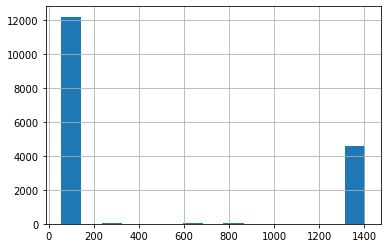

In [15]:
net_traffic[net_traffic['Protocol']=='TCP'].Length.hist(bins=15)
#Most packets between 0-200 bytes

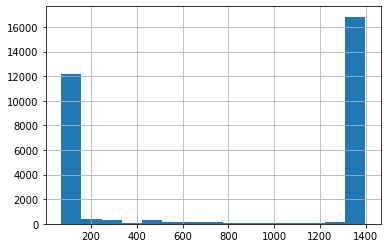

In [17]:
net_traffic[net_traffic['Protocol']=='QUIC'].Length.hist(bins=15)
#Most Packets between 1200-1400 bytes

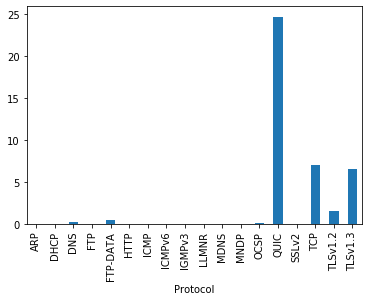

In [18]:
#Calculate the sum of Length for each protocol and display it in a bar plot.Divide by 1024/1024 to convert bytes to MBytes
net_traffic_s=net_traffic.groupby('Protocol').Length.sum()
net_traffic_s_mb=net_traffic_s/(1024*1024)
net_traffic_s_mb.plot(kind='bar')

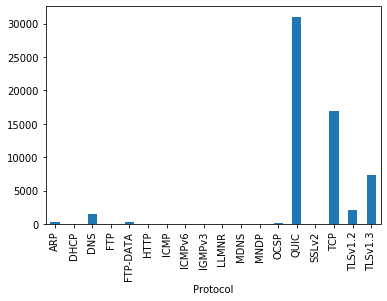

In [20]:
#Print the packet count by protocol
net_traffic_p=net_traffic.groupby('Protocol').Source.count()
net_traffic_p.plot(kind='bar')

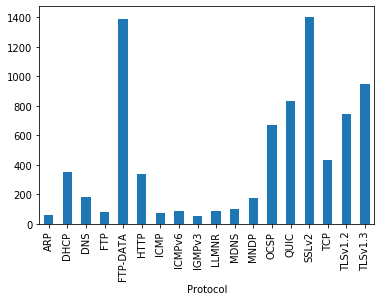

In [21]:
#Divide the total packet size by the packet count to find the average packet size
net_traffic_ap=net_traffic_s/net_traffic_p
net_traffic_ap.plot(kind='bar')
